In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_excel(r'attach_percentage.xls') # Changed name of excel file from Jumbo & Company_ Attach % to attach_percentage
df.sample(5)

,Branch,Store_Name,Dec,Nov,Oct,Sep,Aug
90,Delhi_Ncr,Delhi(Pitampura) Br,0.15,0.28,0.19,0.17,0.20
52,Gujarat,Surat(Varachha) Br,0.20,0.20,0.16,0.18,0.16
40,Thane,Mira Road Br,0.20,0.27,0.28,0.22,0.07
53,Thane,Palghar,0.33,0.30,0.25,0.29,0.16
86,Gujarat,Surat(Mota Varachha),0.23,0.15,0.14,0.00,0.09


In [2]:
df.shape

(163, 7)

In [3]:
df.isnull().any()

Branch        False
Store_Name    False
Dec           False
Nov           False
Oct           False
Sep           False
Aug           False
dtype: bool

In [4]:
df.describe()

,Dec,Nov,Oct,Sep,Aug
count,163.000000,163.000000,163.000000,163.000000,163.000000
mean,0.217239,0.217117,0.170920,0.167301,0.128589
std,0.173270,0.131246,0.116125,0.134518,0.116640
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.095000,0.130000,0.100000,0.080000,0.035000
50%,0.200000,0.200000,0.160000,0.150000,0.110000
75%,0.300000,0.295000,0.240000,0.245000,0.190000
max,1.000000,0.700000,0.710000,0.800000,0.600000


In [5]:
months = ['Aug','Sep','Oct','Nov','Dec']
months_mean = df[months].mean()

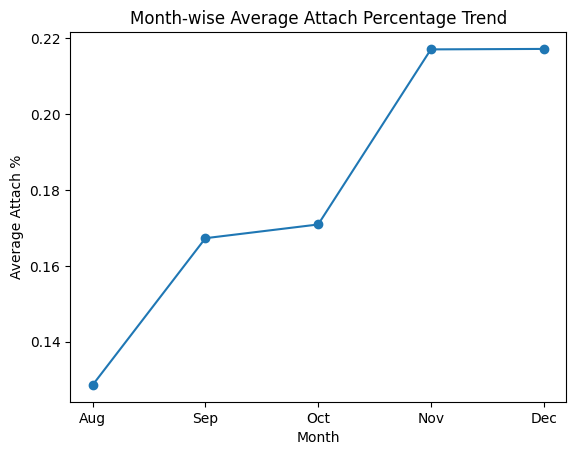

In [6]:
plt.figure()
plt.plot(months, months_mean, marker='o')
plt.xlabel('Month')
plt.ylabel('Average Attach %')
plt.title('Month-wise Average Attach Percentage Trend')
plt.show()

In [7]:
df['avg_attach'] = df[months].mean(axis = 1)
df.sample(3)

,Branch,Store_Name,Dec,Nov,Oct,Sep,Aug,avg_attach
82,Telangana,Ts(Karmanghat),0.10,0.18,0.16,0.08,0.11,0.126
68,Pune,Pune(Hinjewadi) Br,0.21,0.38,0.27,0.23,0.03,0.224
101,Gujarat,Gandhinagar(Sargasan),0.20,0.02,0.01,0.00,0.03,0.052


In [8]:
branch_perf = df.groupby('Branch')['avg_attach'].mean().sort_values(ascending = False)

In [9]:
top_stores = df.sort_values('avg_attach', ascending = False).head(10)
bottom_stores = df.sort_values('avg_attach').head(10)

In [10]:
top_stores

,Branch,Store_Name,Dec,Nov,Oct,Sep,Aug,avg_attach
10,Delhi_Ncr,Delhi(Hauz Khas),0.63,0.60,0.52,0.80,0.56,0.622
69,Pune,Pune(Hadapsar),0.33,0.62,0.71,0.67,0.60,0.586
64,Pune,Pune(Kondhawa),0.48,0.61,0.35,0.35,0.28,0.414
81,Delhi_Ncr,Delhi(Budh Vihar),0.45,0.44,0.45,0.42,0.19,0.390
17,Delhi_Ncr,Delhi(Daryaganj),0.39,0.52,0.31,0.39,0.32,0.386
29,Pune,Pune(Dange Chowk),0.58,0.70,0.56,0.00,0.00,0.368
7,Thane,Bhiwandi Br,0.44,0.44,0.33,0.21,0.39,0.362
91,Delhi_Ncr,Delhi(Narela),0.75,0.29,0.43,0.00,0.32,0.358
21,Delhi_Ncr,Haryana(Mewla M.) Br,0.52,0.40,0.33,0.36,0.15,0.352
2,Delhi_Ncr,Up(Greater Noida) Br,0.25,0.36,0.30,0.41,0.43,0.350


In [11]:
bottom_stores

,Branch,Store_Name,Dec,Nov,Oct,Sep,Aug,avg_attach
33,Mumbai,MAHIM(VS Next),0.0,0.00,0.00,0.00,0.0,0.000
85,Thane,Currey Road,0.0,0.00,0.00,0.00,0.0,0.000
159,Thane,Kharghar Br,0.0,0.00,0.00,0.00,0.0,0.000
162,Gujarat,Vadodara(Kothi Road),0.0,0.00,0.00,0.00,0.0,0.000
160,Telangana,Ap(Tirupathi-Leela Mahal Circle),0.0,0.00,0.00,0.00,0.0,0.000
161,Telangana,Ap(Rajamundry),0.0,0.00,0.00,0.00,0.0,0.000
155,Telangana,Ap(Ntr Circle),0.0,0.00,0.00,0.00,0.0,0.000
153,Mumbai,Boisar Br,0.0,0.00,0.10,0.00,0.0,0.020
151,Thane,Ulhasnagar Br,0.0,0.03,0.08,0.00,0.0,0.022
154,Telangana,Ap(Vizag),0.0,0.00,0.00,0.17,0.0,0.034


In [12]:
store_consistency = df.set_index('Store_Name')[['Aug','Sep','Oct','Nov','Dec']].agg(['mean','std'], axis=1)

In [13]:
store_consistency.sample(10)

,mean,std
Store_Name,,
Nallasopara Br,0.086,0.094499
Ts(Karmanghat),0.126,0.042190
Chakala Andheri Br,0.156,0.055045
Ts(Kothapet),0.200,0.091924
Ts(Nallakunta),0.142,0.105451
Delhi(Mahavir Enclave),0.300,0.094604
Mumbra(Kausa),0.078,0.064576
Delhi(Shahdara) Br,0.320,0.067823
Ahmedabad(Chandkheda Rd) Br,0.106,0.047749


In [14]:
sc = store_consistency.copy()

In [15]:
q1,q3 = sc['mean'].quantile([0.25, 0.75])
std_mid = sc['std'].median()

In [16]:
sc['performance'] = pd.cut(
    sc['mean'],
    [-1, q1, q3, 1],
    labels = ['low', 'mid', 'high']
)

In [17]:
sc['consistency'] = sc['std'].le(std_mid).map({True:'Consistent', False:'Inconsistent'})
sc['segment'] = sc['performance'].astype(str) + ' + ' + sc['consistency']

In [18]:
sc.head()

,mean,std,performance,consistency,segment
Store_Name,,,,,
Delhi(Janakpuri) Br,0.210,0.041833,mid,Consistent,mid + Consistent
Haryana(Gurgaon) Br,0.188,0.096799,mid,Inconsistent,mid + Inconsistent
Up(Greater Noida) Br,0.350,0.075166,high,Consistent,high + Consistent
Pune(Bhosari) Br,0.294,0.092898,high,Inconsistent,high + Inconsistent
Ahmedabad(Maninagar) Br,0.164,0.039749,mid,Consistent,mid + Consistent


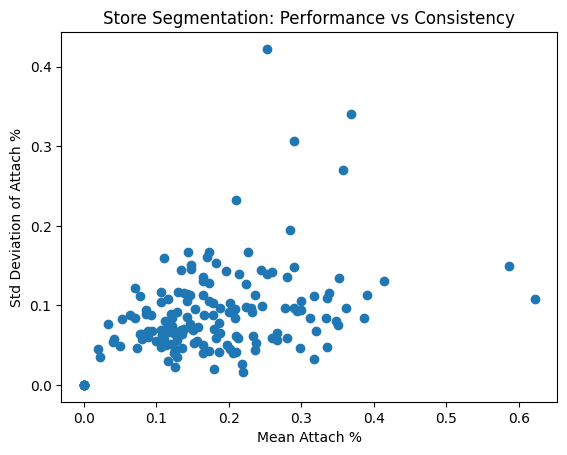

In [19]:
plt.figure()
plt.scatter(sc['mean'], sc['std'])
plt.xlabel('Mean Attach %')
plt.ylabel('Std Deviation of Attach %')
plt.title('Store Segmentation: Performance vs Consistency')

plt.savefig('store_segmentation.png', bbox_inches='tight')
plt.show()

In [20]:
month_stats = df[['Aug','Sep','Oct','Nov','Dec']].aggregate(['mean','median','std'])
month_stats

,Aug,Sep,Oct,Nov,Dec
mean,0.128589,0.167301,0.170920,0.217117,0.217239
median,0.110000,0.150000,0.160000,0.200000,0.200000
std,0.116640,0.134518,0.116125,0.131246,0.173270


In [21]:
month_long = df.melt(
    value_vars = ['Aug','Sep','Oct','Nov','Dec'],
    var_name = 'Month',
    value_name = 'Attach'
)

In [22]:
month_long.head()

,Month,Attach
0,Aug,0.24
1,Aug,0.04
2,Aug,0.43
3,Aug,0.32
4,Aug,0.17


In [23]:
month_dist = month_long.groupby('Month')['Attach'].agg(['mean','median','std']) 

In [24]:
month_dist

,mean,median,std
Month,,,
Aug,0.128589,0.11,0.116640
Dec,0.217239,0.20,0.173270
Nov,0.217117,0.20,0.131246
Oct,0.170920,0.16,0.116125
Sep,0.167301,0.15,0.134518


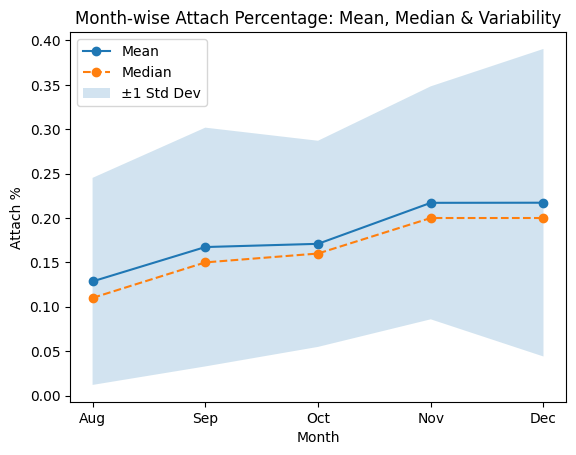

In [25]:
import matplotlib.pyplot as plt

months = ['Aug','Sep','Oct','Nov','Dec']

mean_vals = month_dist.loc[months, 'mean'].values
median_vals = month_dist.loc[months, 'median'].values
std_vals = month_dist.loc[months, 'std'].values

plt.figure()

# mean line
plt.plot(months, mean_vals, marker='o', label='Mean')

# median line
plt.plot(months, median_vals, marker='o', linestyle='--', label='Median')

# std deviation band
plt.fill_between(
    months,
    mean_vals - std_vals,
    mean_vals + std_vals,
    alpha=0.2,
    label='±1 Std Dev'
)

plt.xlabel('Month')
plt.ylabel('Attach %')
plt.title('Month-wise Attach Percentage: Mean, Median & Variability')
plt.legend()
plt.savefig('month_wise_attach_mean_median_std.png', bbox_inches='tight')
plt.show()

In [26]:
from sklearn.linear_model import LinearRegression
import numpy as np

months = ['Aug','Sep','Oct','Nov','Dec']
X = np.arange(1,6).reshape(-1,1)

In [27]:
def pred_jan(row):
    y = row[months].values
    model = LinearRegression()
    model.fit(X,y)
    return model.predict([[6]])[0]

df['Jan_Predicted_Attach'] = df.apply(pred_jan, axis=1)

In [28]:
df.head()

,Branch,Store_Name,Dec,Nov,Oct,Sep,Aug,avg_attach,Jan_Predicted_Attach
0,Delhi_Ncr,Delhi(Janakpuri) Br,0.23,0.17,0.16,0.25,0.24,0.210,0.180
1,Delhi_Ncr,Haryana(Gurgaon) Br,0.21,0.26,0.15,0.28,0.04,0.188,0.284
2,Delhi_Ncr,Up(Greater Noida) Br,0.25,0.36,0.30,0.41,0.43,0.350,0.227
3,Pune,Pune(Bhosari) Br,0.33,0.33,0.36,0.13,0.32,0.294,0.360
4,Gujarat,Ahmedabad(Maninagar) Br,0.19,0.11,0.14,0.21,0.17,0.164,0.146


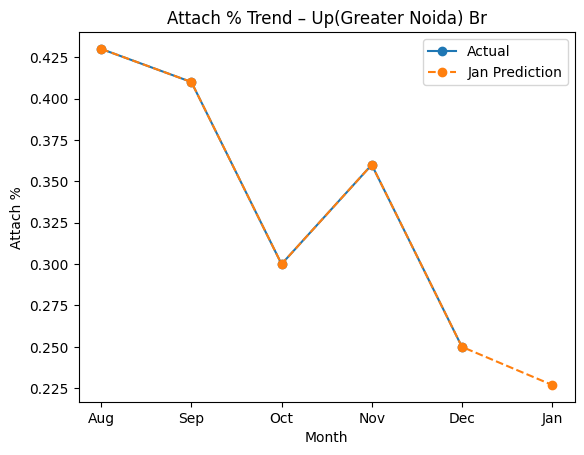

In [29]:
store_row = df.iloc[2]   # you can change index
y = store_row[months].values
jan_pred = store_row['Jan_Predicted_Attach']

x_hist = np.arange(1, 6)
x_full = np.arange(1, 7)
y_full = np.append(y, jan_pred)

plt.figure()
plt.plot(x_hist, y, marker='o', label='Actual')
plt.plot(x_full, y_full, linestyle='--', marker='o', label='Jan Prediction')

plt.xticks(
    ticks=[1,2,3,4,5,6],
    labels=['Aug','Sep','Oct','Nov','Dec','Jan']
)

plt.xlabel('Month')
plt.ylabel('Attach %')
plt.title(f"Attach % Trend – {store_row['Store_Name']}")
plt.legend()
plt.savefig('jan_prediction_example.png', bbox_inches='tight')
plt.show()

In [30]:
sel_months = ['Oct','Nov','Dec']
weights = np.array([0.2,0.3,0.5])
df['Jan_Weighted_Pred'] = df[sel_months].values@weights
df['Jan_Weighted_Pred'] = df['Jan_Weighted_Pred'].clip(0,1)

In [31]:
df.sample(10)

,Branch,Store_Name,Dec,Nov,Oct,Sep,Aug,avg_attach,Jan_Predicted_Attach,Jan_Weighted_Pred
157,Gujarat,Vadodara(Alkapuri) Br,0.18,0.13,0.08,0.13,0.12,0.128,0.164,0.145
130,Thane,Badlapur,0.00,0.17,0.19,0.36,0.14,0.172,0.031,0.089
111,Telangana,Ts(Kompally- Golden Plaza),0.13,0.32,0.14,0.10,0.00,0.138,0.282,0.189
65,Gujarat,Ahmedabad(Odhav) Br,0.46,0.06,0.17,0.07,0.10,0.172,0.385,0.282
5,Pune,Pune(Nagar Road) Br,0.46,0.35,0.17,0.11,0.21,0.260,0.482,0.369
53,Thane,Palghar,0.33,0.30,0.25,0.29,0.16,0.266,0.371,0.305
128,Telangana,Ap(Tirupathi-M.R.Pally),0.17,0.09,0.13,0.17,0.07,0.126,0.162,0.138
41,Gujarat,Surat(Ved Road),0.29,0.28,0.13,0.08,0.08,0.172,0.358,0.255
82,Telangana,Ts(Karmanghat),0.10,0.18,0.16,0.08,0.11,0.126,0.150,0.136
36,Telangana,Ts(Nallakunta),0.29,0.16,0.10,0.00,0.16,0.142,0.268,0.213
